# Scores for Weyn et al 2020

WeatherBench scores for https://www.essoar.org/doi/10.1002/essoar.10502543.1

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import xarray as xr
from src.regrid import *
from src.score import *

In [14]:
DATADIR = '/data/stephan/WeatherBench/5.625deg/'

In [16]:
z500_valid = load_test_data(f'{DATADIR}geopotential_500', 'z')
t850_valid = load_test_data(f'{DATADIR}temperature_850', 't')

In [7]:
ds_raw = xr.open_dataset('/data/stephan/Weyn/forecast_dlwp-cs_WeatherBench.nc')

In [8]:
ds_raw

<xarray.Dataset>
Dimensions:     (f_hour: 56, lat: 91, lon: 180, time: 418)
Coordinates:
  * lon         (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat         (lat) float64 89.01 87.03 85.05 83.08 ... -85.05 -87.03 -89.01
  * f_hour      (f_hour) float64 6.0 12.0 18.0 24.0 ... 318.0 324.0 330.0 336.0
  * time        (time) datetime64[ns] 2017-01-01 ... 2018-12-30T12:00:00
Data variables:
    z500        (f_hour, time, lat, lon) float32 ...
    tau300-700  (f_hour, time, lat, lon) float32 ...
    z1000       (f_hour, time, lat, lon) float32 ...
    t2m         (f_hour, time, lat, lon) float32 ...

In [9]:
ds = regrid(ds_raw, ddeg_out=5.625)

Create weight file: bilinear_91x180_32x64_peri.nc
using dimensions ('lat', 'lon') from data variable z500 as the horizontal dimensions for this dataset.
using dimensions ('lat', 'lon') from data variable z500 as the horizontal dimensions for this dataset.


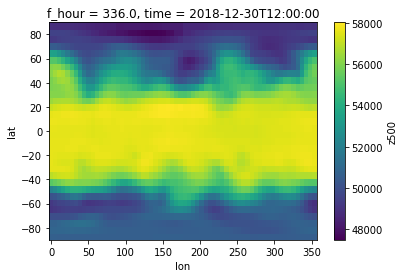

In [11]:
ds.z500.isel(f_hour=-1, time=-1).plot()

In [20]:
ds = ds.rename({'f_hour': 'lead_time'})

In [23]:
rmses = evaluate_iterative_forecast(ds.z500, z500_valid).compute()

In [27]:
rmses.sel(lead_time=[72, 120])

<xarray.DataArray 'rmse' (lead_time: 2)>
array([388.05496707, 623.93437454])
Coordinates:
    level      int32 500
  * lead_time  (lead_time) float64 72.0 120.0

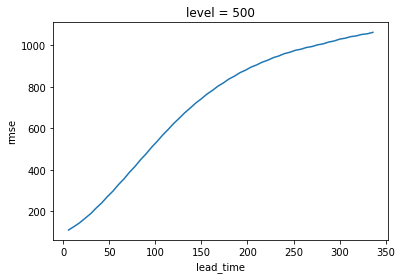

In [25]:
rmses.plot()